# <font color=purple>**Pollard Algorithms**</font>

## $1.$   <font color=black>*Pollard (p-1) Algorithm*</font>

### Theory :
Let $p$ be the unknown prime divisor of an odd composite integer $n$ such that $p-1$ is a product of relatively small primes. Let $q$ be any integer such that $(p-1)|q$. For instance, $q$ could be either $k!$ or $lcm(1,2,....,k)$ for large enough $k$. Now choose a base $a$ such that $1<a<(p-1)$ and calculate $a^q\equiv m \ mod(n)$.
Because $q=(p-1).j$ for some $j$, we get: $$m\equiv a^q \equiv (a^{p-1})^j\equiv 1^j=1\ mod(p)$$
 From above we get $p|(m-1)$. So we get $gcd(m-1,n)>1$ as our non-trivial divisor as long as $m\not \equiv 1\ mod(n)$. If $gcd(m-1,n)=1$ we do the same for different base $a$. It works better for integers with small factors.

In [1]:
import math 
import random as r
import numpy as np
from decimal import Decimal
def pollard1(n,q):
    list1 = [i for i in range(1,q+1)]
    lcm = 1
    for i in list1:
        lcm = lcm*i//math.gcd(lcm, i)
    base = r.randint(2,n-1)
    m=pow(base,lcm,n)
    gcd=math.gcd(m-1,n)
    if gcd != n and gcd != 1: 
        return gcd
    else:                     
        return 'Failure'

In [2]:
import time
strt = time.perf_counter()
print(pollard1(1000000000099987889,700000))
end = time.perf_counter()
print(f'Time taken = {end-strt}')

10000001101
Time taken = 228.57544100000007


In [3]:
# Works fine if factors are small
import time
strt = time.perf_counter()
print(pollard1(92345674632906598735689234630285698375687,7) )
end = time.perf_counter()
print(f'Time taken = {end-strt}')

4747
Time taken = 0.00036330000000361906


In [4]:
import time
strt = time.perf_counter()
print(pollard1(242796132135923,3500))
end = time.perf_counter()
print(f'Time taken = {end-strt}')

7113817
Time taken = 0.009420100000056664


## Running time analysis

#### For Odd inputs only

In [5]:
import matplotlib.pyplot as plt
import time
import math
import random
def analysis(B,k):
    x = []
    y = []
    r = 0
    for n in range(2,B):
        start = 10**(n)
        end = 10**(n+1)
        st = (end-start)/k
        for i in range(1,k+1):
            L = random.randint(start,start+st)
            while L%2 == 0:
                L = random.randint(start,start+st)
            start = start+ st
            x.append(int(L))
            s = time.perf_counter()
            Val = pollard1(L,int(L**0.26))
            e = time.perf_counter()
            if Val == 'Failure':
                r = r+1
            y.append(e-s)
    plt.figure(figsize=(15,10))
    plt.title("Execution Time Variation")
    plt.plot(x,y, color = 'b')
    plt.xlabel('values (10^2 to 10^20)')
    plt.ylabel('Time of Execution(seconds)')
    plt.show()

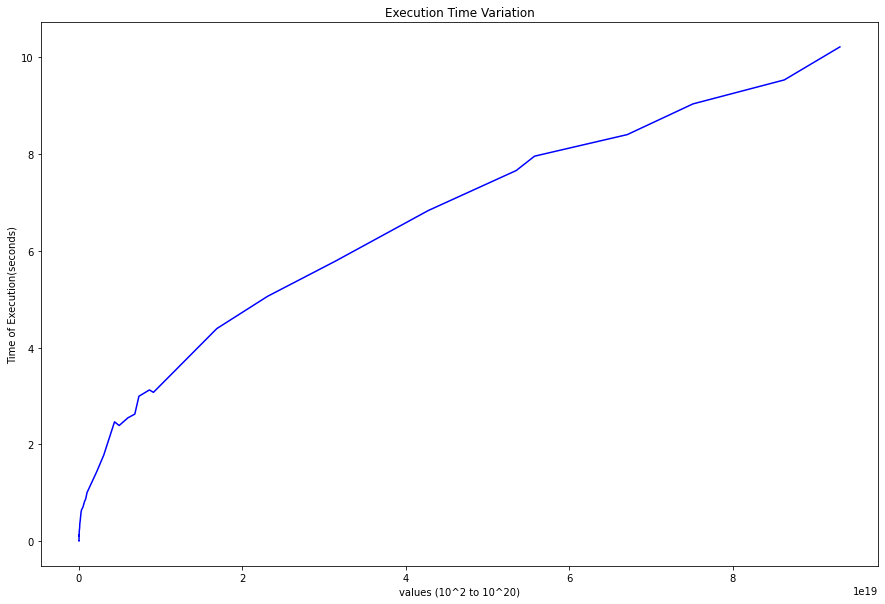

In [6]:
analysis(20,10)

## $2.$   <font color=black>*Pollard-Rho Algorithm*</font>

### Theory:
First we choose a simple polynomial of degree atleast 2 with integer coefficients such as we have taken for below algorithm a quadratic polynomial of form $f(x) = x^2 + a \ ;\ a\neq 0,-2$. Then we take a initial value, say, $x_0$ and create random sequence $x_1,x_2,....$ from recursive relation $$x_{k+1}\equiv f(x_k)\ (mod\ n)\ ;\ k=0,1,2,...$$ where $x_1=f(x_0), \ x_2=f(x_1),...$ are computed modulo $n$.
Now if $d$ is any non-trivial divisor of $n$ then we know that it has few congruence classes compared to $n$. There will probably exist in our sequence some $x_j$ and $x_k$ $(x_j<x_k)$ such that $x_k\not \equiv x_j\ (mod\ n)$ but $x_k\equiv x_j\ (mod\ d)$. And then we can get a non-trivial divisor of $n$ by computing $gcd(x_k-x_j,n)$. 
It can turn out that divisor obtained is $n$, in that case $x_k\equiv x_j\ (mod\ n)$, then we choose a different starting value $x_0$ or a different polynomial.

Now task of computing $gcd(x_k-x_j,n)$ increase as $k$ increases. We can reduce it by checking cases where $k=2.j$ as $$x_k\equiv x_j\ (mod\ d);\ j<k\ \implies f(x_k)\equiv f(x_j)\ (mod\ d)\ i.e.,\ x_{k+1}\equiv x_{j+1}\ (mod\ d)$$ Providing us with period of length (k-j). So we will get $x_{2.t}\equiv x_t\ (mod\ d)$ whenever $t$ is taken to be multiple of $(k-j)$ larger than $j$. 

In [12]:
# f(x) = x^2 + a
import math
def pollard2(n,x1,a,bound):      # a!= 0 and -2, x1 = initial value of sequence {x_i}
    list1=[x1]
    for i in range(1,bound):
        x1=(pow(x1,2)+a)%n 
        list1.append(x1)
    for i in range(1,int(bound/2)):
            n1=list1[2*i]-list1[i]
            gc=math.gcd(n1,n)
            if n1%n!=0 and gc>1:
                print("Period(w.r.t. Divisor)=",i)
                return "Divisor=",gc
                break 

In [8]:
import time
strt = time.perf_counter()
print(pollard2(1234567895341,1,1,100) )
end = time.perf_counter()
print(f'Time taken = {end-strt}')

Period(w.r.t. Divisor)= 4
('Divisor=', 11)
Time taken = 0.0004268999999794687


In [9]:
import time
strt = time.perf_counter()
print(pollard2(17186,1,1,200) )
end = time.perf_counter()
print(f'Time taken = {end-strt}')

Period(w.r.t. Divisor)= 2
('Divisor=', 2)
Time taken = 0.0005029999999806023


#### Odd Inputs only

In [13]:
import matplotlib.pyplot as plt
import time
import math
import random
def analysis(B):
    x = []
    y = []
    r = 0
    for n in range(2,B):
        start = 10**(n)
        end = 10**(n+1)
        k = 10
        st = (end-start)/k
        for i in range(1,k+1):
            start = i*st
            end = (i+1)*st
            L = random.randint(start,end)
            while L%2 == 0:
                L = random.randint(start,end)
            x.append(int(L))
            s = time.perf_counter()
            Val = pollard2(L,2,1,int(L**0.25))
            e = time.perf_counter()
            if Val == None:
                r = r+1
            y.append(e-s)
    plt.figure(figsize=(15,10))
    plt.title("Execution Time Variation")
    plt.plot(x,y, color = 'b')
    plt.xlabel('values')
    plt.ylabel('Time of Execution(seconds)')
    plt.show()

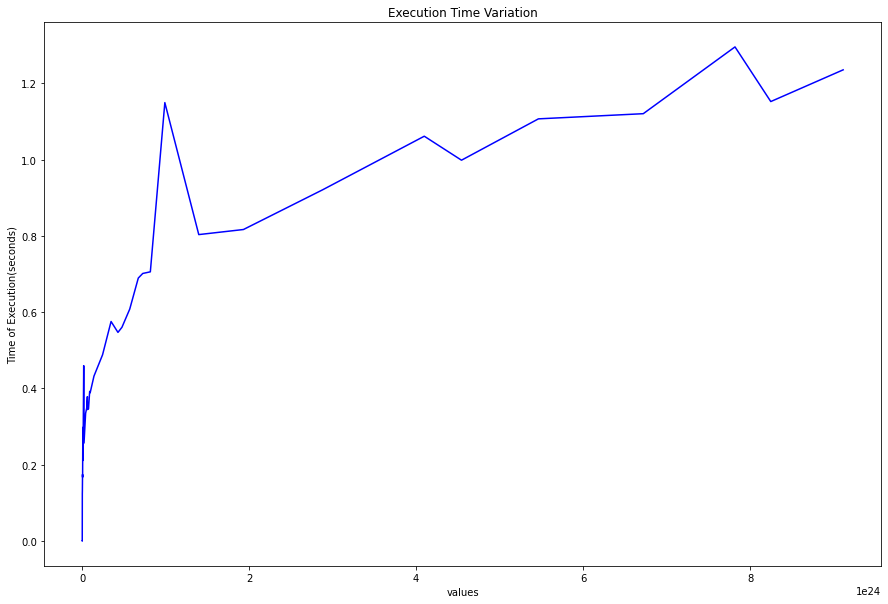

In [14]:
analysis(25)

In [ ]:
# Better than Pollard (p-1) to get large factors
import time
strt = time.perf_counter()
pollard2(242796132135923,1,1,2700)  
end = time.perf_counter()
print(f'Time taken = {end-strt}')